### 1. Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for PDF report generation
from fpdf import FPDF


### 2. Load Dataset

In [2]:
# Load dataset
df = pd.read_csv("Shark Tank India.csv")

# Quick view
print(df.head())
print(df.info())


   Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1    20-Dec-21   
1              1      BoozScooters               1             2    20-Dec-21   
2              1  HeartUpMySleeves               1             3    20-Dec-21   
3              1         TagzFoods               2             4    20-Dec-21   
4              1      HeadAndHeart               2             5    20-Dec-21   

  Season End Original Air Date                Episode Title           Anchor  \
0   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
1   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
2   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
3   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   

                       Industry 


### 3. Clean Data

In [21]:
# Remove currency symbols & convert to float
df['Original Ask Amount'] = df['Original Ask Amount'].astype(str).str.replace('[₹$,]', '', regex=True)
df['Original Ask Amount'] = pd.to_numeric(df['Original Ask Amount'], errors='coerce')

# Clean Equity
df['Original Offered Equity'] = df['Original Offered Equity'].astype(str).str.replace('%','', regex=True)
df['Original Offered Equity'] = pd.to_numeric(df['Original Offered Equity'], errors='coerce')

# Create Deal_Status column: 'Deal' if Accepted Offer is not null, else 'No Deal'
df['Deal_Status'] = np.where(df['Accepted Offer'].notnull(), 'Deal', 'No Deal')

# Fill missing values
df['Industry'].fillna('Unknown', inplace=True)

print(df.describe())


       Season Number  Episode Number  Pitch Number   Started in  \
count     634.000000      634.000000    634.000000   577.000000   
mean        2.500000       24.055205    317.500000  2019.232236   
std         1.106137       15.102549    183.164316     3.060410   
min         1.000000        0.000000      1.000000  1995.000000   
25%         2.000000       11.000000    159.250000  2018.000000   
50%         2.000000       24.000000    317.500000  2020.000000   
75%         3.000000       36.000000    475.750000  2021.000000   
max         4.000000       52.000000    634.000000  2024.000000   

       Number of Presenters  Male Presenters  Female Presenters  \
count            634.000000       568.000000         382.000000   
mean               2.000000         1.593310           0.942408   
std                0.796913         0.849374           0.624800   
min                1.000000         0.000000           0.000000   
25%                1.000000         1.000000           1.0000

C:\Users\HP\AppData\Local\Temp\ipykernel_9324\3559075300.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Industry'].fillna('Unknown', inplace=True)


### 4. Analysis

In [11]:

# Industry Analysis
# Count of startups per industry
industry_count = df['Industry'].value_counts()

# Average pitch by industry
industry_avg_pitch = df.groupby('Industry')['Original Ask Amount'].mean().sort_values(ascending=False)

# Deal success rate by industry
industry_success = df.groupby('Industry')['Deal_Status'].value_counts(normalize=True).unstack().fillna(0)
print(industry_count)
print(industry_avg_pitch)
print(industry_success)

Industry
Food and Beverage               142
Beauty/Fashion                  127
Technology/Software              58
Medical/Health                   56
Manufacturing                    52
Lifestyle/Home                   43
Business Services                42
Children/Education               25
Vehicles/Electrical Vehicles     20
Fitness/Sports/Outdoors          19
Green/CleanTech                  15
Agriculture                       7
Animal/Pets                       6
Liquor/Alcohol                    6
Electronics                       5
Others                            5
Entertainment                     4
Hardware                          2
Name: count, dtype: int64
Industry
Food and Beverage               279.908451
Entertainment                   181.250000
Electronics                     108.000000
Vehicles/Electrical Vehicles     96.250000
Liquor/Alcohol                   95.833333
Lifestyle/Home                   91.686047
Business Services                91.071429
Manufac

In [20]:
# Investors Analysis
# Use 'Invested Guest Name' column for investor analysis

df_investors = df.copy()
df_investors['Invested Guest Name'] = df_investors['Invested Guest Name'].astype(str).str.split(',')
df_investors = df_investors.explode('Invested Guest Name')
df_investors['Invested Guest Name'] = df_investors['Invested Guest Name'].str.strip()

# Remove 'nan' and 'Unknown' investors
df_investors = df_investors[(df_investors['Invested Guest Name'] != 'nan') & (df_investors['Invested Guest Name'] != 'Unknown')]

# Count top investors
top_investors = df_investors['Invested Guest Name'].value_counts().head(10)
print(top_investors)

Invested Guest Name
Ashneer Grover      21
Kunal Bahl          11
Ghazal Alagh         8
Azhar Iqubal         8
Radhika Gupta        6
Varun Dua            4
Vikas D Nahar        2
Ronnie Screwvala     2
Viraj Bahl           2
Chirag Nakrani       2
Name: count, dtype: int64


### 5️ Visualizations

C:\Users\HP\AppData\Local\Temp\ipykernel_9324\2703490860.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_deals.values, y=industry_deals.index, palette="crest")


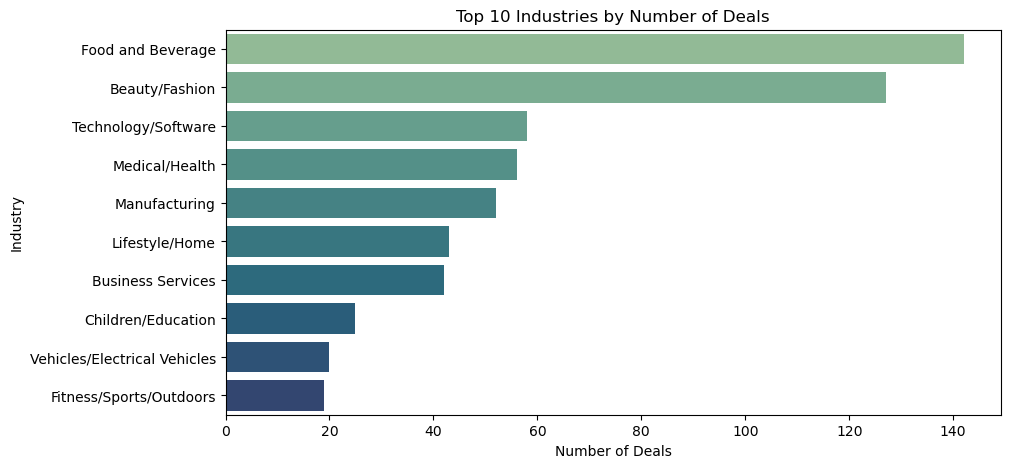

In [ ]:
# Industry analysis(top 10)
industry_deals = df['Industry'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=industry_deals.values, y=industry_deals.index, palette="crest")
plt.title('Top 10 Industries by Number of Deals')
plt.xlabel('Number of Deals')
plt.ylabel('Industry')
plt.show()



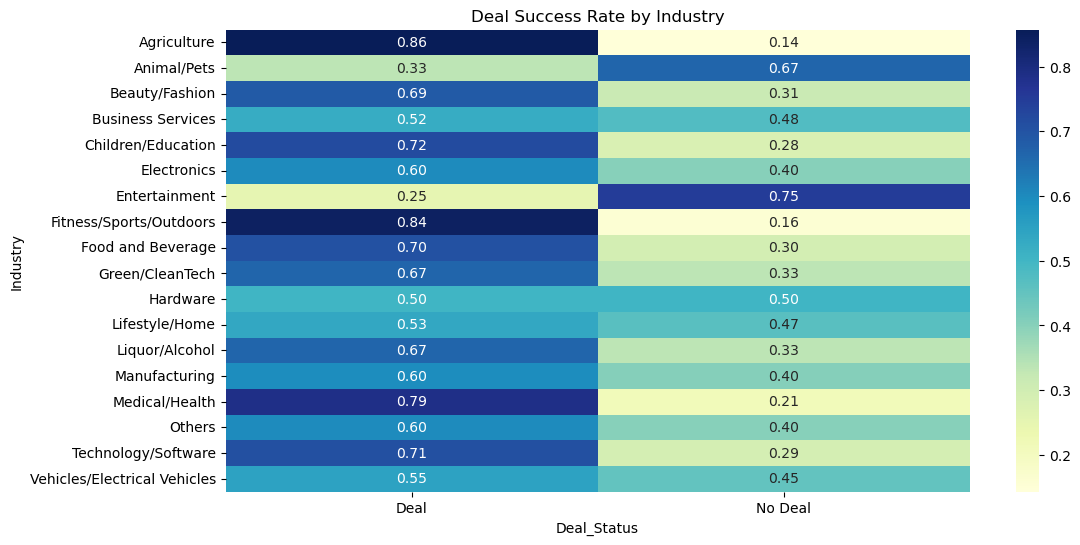

In [24]:
# Deal Success Rate Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(industry_success, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Deal Success Rate by Industry')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9324\2392768877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.index, y=top_investors.values, palette="coolwarm")


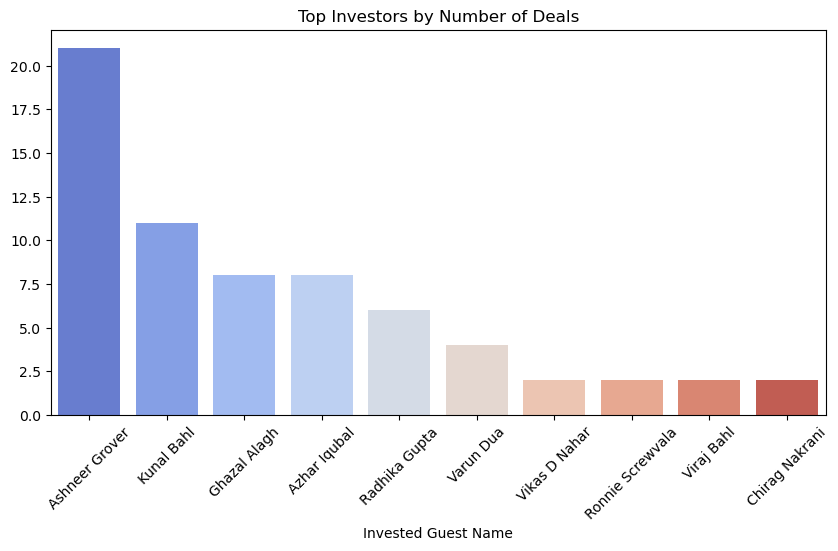

In [25]:
# Top Investors
plt.figure(figsize=(10,5))
sns.barplot(x=top_investors.index, y=top_investors.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Top Investors by Number of Deals')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9324\4156045883.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_funded.index, y=top_funded.values, palette="viridis")


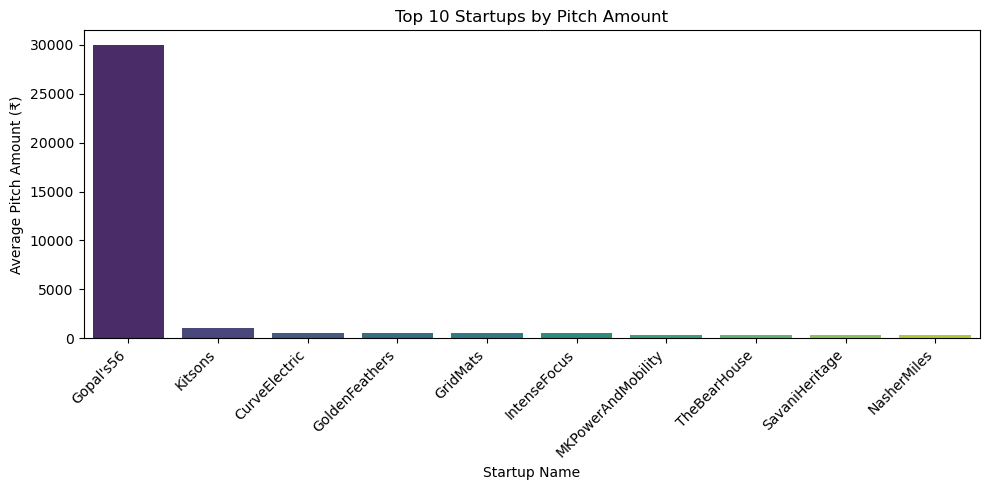

In [27]:
# Sort startups by Pitch Amount (using the correct column name)
top_funded = df.groupby('Startup Name')['Original Ask Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_funded.index, y=top_funded.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Pitch Amount (₹)")
plt.title("Top 10 Startups by Pitch Amount")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9324\1528562984.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_deals.values, y=industry_deals.index, palette="crest")


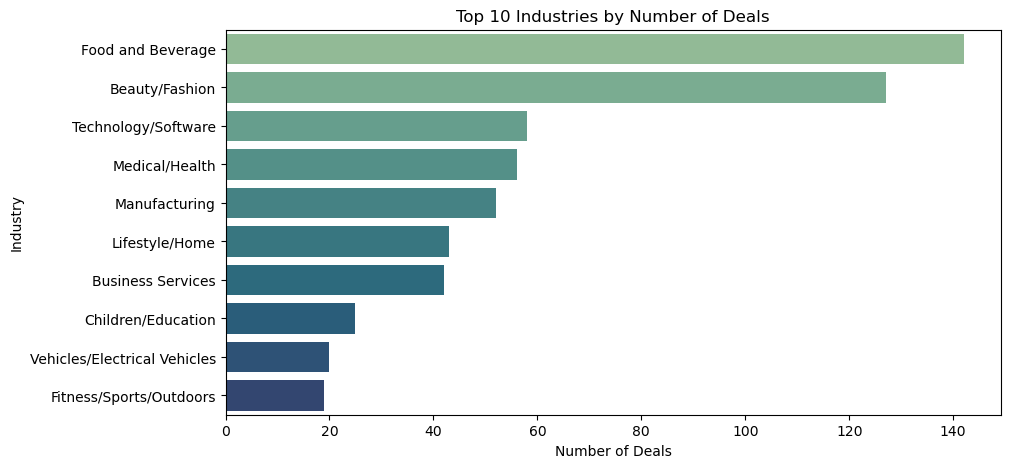